In [1]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)

In [2]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

| Field          | Description                                                     | Type of variable |
|----------------|-----------------------------------------------------------------|------------------|
| fixVersions    | Search for issues that are assigned to a particular fix version | list of versions |
| issuetype      | Type of issue                                                   | Categorical      |
| project        | The project the issue belongs to                                | String           |
| resolution     | The resolution of the issue                                     | Categorical      |
| resolutiondate | The date the issue was resolved                                 | Date             |
| workratio      | calculated as workRatio = (timeSpent / originalEstimate) x 100  | Number           |
| lastViewed     | The date at which the issue was last viewed                     | Date             |
| watches        | Users watching the issue                                        | ?                |
| created        | The date of the creation of the issue                           | Date             |
| priority       | Priority assigned to the issue                                  | Categorical      |
| labels         | Labels assigned to the issue                                    | Strings          |
| versions       | The versions affected by the issue                              | List             |
| assignee       | The user the issue is assigned to                               | User             |
| status         | The status of the issue                                         | Categorical      |
| description    | The description of the issue                                    | String           |
| summary        | A summary of the issue reported                                 | String           |
| creator        | The user that created the issue                                 | User             |
| subtasks       | The subtasks of the issue                                       | List of issues   |
| reporter       | The user who reported the issue. May be the same as the creator | User             |
| duedate        | The date the issue is due to be resolved                        | Date             |

### Import issues

In [131]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Import versions

In [129]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import fixVersions

In [80]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import labels

In [16]:
labels = pd.read_csv(f"{csv_folder}/issues_labels.csv", index_col=0)
labels.head()

,issue_id,label
0,98118,compute_engine
1,98118,governance
2,98118,web_api
3,98084,hardening
4,98084,usability-testing-findings


### Import subtasks

In [18]:
substaks = pd.read_csv(f"{csv_folder}/issues_subtasks.csv", index_col=0)
substaks.head()

,issue_id,subtask_key,subtask_id
0,97393,SONAR-13858,97372
1,97393,SONAR-13868,97394
2,97387,SONAR-13863,97388
3,97387,SONAR-13864,97389
4,97387,SONAR-13865,97390


## Analysis

In [8]:
issues_df.columns

Index(['issue_key', 'issue_id', 'issuetype', 'customfield_12130',
       'customfield_11041', 'customfield_12132', 'customfield_12131',
       'project', 'customfield_12134', 'customfield_12530',
       ...
       'assignee_name', 'reporter_key', 'reporter_name', 'creator_key',
       'creator_name', 'status_id', 'status_name', 'resolution_id',
       'resolution_name', 'votes_votes'],
      dtype='object', length=108)

In [81]:
versions.columns

Index(['issue_id', 'version_name', 'version_id'], dtype='object')

In [82]:
fixversions.columns

Index(['issue_id', 'fixVersion_name', 'fixVersion_id'], dtype='object')

In [12]:
labels.columns

Index(['issue_id', 'label'], dtype='object')

In [13]:
substaks.columns

Index(['issue_id', 'subtask_key', 'subtask_id'], dtype='object')

We have four datasets, related to each other via the primary key "issue_id". They represent different aspects of the Jira issues and will therefore analyzed in combination.

### Shape

In [23]:
issues_df.shape

(11507, 108)

In [24]:
versions.shape

(3335, 3)

In [25]:
labels.shape

(2983, 2)

In [26]:
substaks.shape

(851, 3)

### Preliminary analysis of issue fields
We analyse the fields with no clear name or description in order to decide whether to keep them or exclude them from the analysis.

In [51]:
customfields = [col for col in issues_df.columns if col.startswith("customfield")]
len(customfields)

65

There are 65 customfields for which we do not have description. We let pandas describe them and manually select the ones which appear to possibly be useful to our analysis

In [71]:
issues_df[customfields].describe(include = ['O'])

,customfield_12130,customfield_11041,customfield_12132,customfield_12134,customfield_12133,customfield_12136,customfield_12135,customfield_12138,customfield_12137,customfield_11631,customfield_11038,customfield_10930,customfield_10931,customfield_10932,customfield_12034,customfield_12430,customfield_11930,customfield_11730,customfield_12536,customfield_10437,customfield_10438
count,899,11507,899,899,899,899,899,899,899,2005,2,2,33,43,1058,1,11507,108,99,5525,11507
unique,1,11507,1,1,1,1,1,1,1,35,2,2,1,1,1,1,1,3,1,3,1
top,P3-Medium,0|i02sdj:,No root cause identified,Not captured yet,Not assessed yet,Not captured yet,No action plan,Not captured yet,Not captured yet,None,MMF-1940,http://jira.codehaus.org/browse/SONARPLUGINS-923,yes,"[<JIRA CustomFieldOption: value='Yes', id='107...",SonarQube,https://sonarsource.productboard.com/feature-b...,{},Minutes,New,,[]
freq,899,1,899,899,899,899,899,899,899,1971,1,1,33,43,1058,1,11507,57,99,4986,11507


We selected the ones which have more than only one unique value
We selected the ones which have less unique values than all issues (otherwise it acts like a not informative id)
We further list their values here:

In [66]:
issues_df.customfield_10930.value_counts().head(10)

http://jira.codehaus.org/browse/SONARPLUGINS-923    1
https://github.com/SonarSource/sonar/pull/4         1
Name: customfield_10930, dtype: int64

In [62]:
issues_df.customfield_10437.value_counts().head(10)

         4986
< 4.5     538
5.6         1
Name: customfield_10437, dtype: int64

In [61]:
issues_df.customfield_11730.value_counts().head(10)

Minutes    57
Hours      43
Days        8
Name: customfield_11730, dtype: int64

In [63]:
issues_df.customfield_11631.value_counts().head(5)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1971
Maybe add a production note to warn SonarCloud users about this change?                                                                                                                                                                                                                                                                                                            

By filtering only customfields with more than 1 unique value and less unique values than the number of issues we obtained 4 to further analyze.
The three customfields which have been analysed did not clearly show their meaning and are therefore not included in the analysis.

In [84]:
columns_to_ignore = ["fixVersions", "issuelinks", "versions", "subtasks", "components", "labels"]

We also ignore the columns containing complex objects and which we have mapped to a separate dataframe (except *components* and *issuelinks*)

In [96]:
focus_columns = set(issues_df.columns) - set(customfields) - set(columns_to_ignore)
focus_columns

{'assignee',
 'assignee_key',
 'assignee_name',
 'created',
 'creator',
 'creator_key',
 'creator_name',
 'description',
 'duedate',
 'edition',
 'environment',
 'issue_id',
 'issue_key',
 'issuetype',
 'issuetype_id',
 'issuetype_name',
 'lastViewed',
 'priority',
 'priority_id',
 'priority_name',
 'project',
 'reporter',
 'reporter_key',
 'reporter_name',
 'resolution',
 'resolution_id',
 'resolution_name',
 'resolutiondate',
 'status',
 'status_id',
 'status_name',
 'summary',
 'updated',
 'votes',
 'votes_votes',
 'watches',
 'workratio'}

### Describe

In [99]:
issues_df = issues_df[focus_columns]

In [100]:
issues_df.describe()

,issue_id,priority_id,votes_votes,status_id,resolution_id,issuetype_id,votes,workratio
count,11507.000000,11507.000000,11507.000000,11507.000000,10928.000000,11507.000000,11507.000000,11507.000000
mean,47392.045364,3.090119,0.423829,29.214391,288.809755,3.036847,0.423829,-0.869123
std,22032.848381,0.431623,3.008909,483.632055,1688.203007,1.429871,3.008909,3.271679
min,18608.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.000000
25%,29357.500000,3.000000,0.000000,6.000000,1.000000,1.000000,0.000000,-1.000000
50%,32248.000000,3.000000,0.000000,6.000000,1.000000,4.000000,0.000000,-1.000000
75%,63690.500000,3.000000,0.000000,6.000000,1.000000,4.000000,0.000000,-1.000000
max,97898.000000,5.000000,192.000000,10002.000000,10601.000000,6.000000,192.000000,100.000000


In [101]:
issues_df.describe(include = ['O'])

,environment,reporter_name,issuetype_name,creator_name,summary,priority,status_name,status,assignee,description,reporter_key,issuetype,edition,assignee_name,creator,issue_key,project,resolution,resolution_name,watches,priority_name,assignee_key,reporter,creator_key
count,668,11502,11507,11502,11507,11507,11507,11507,8746,9842,11502,11507,2341,8746,11502,11507,11507,10928,10928,11507,11507,8746,11502,11502
unique,580,830,6,828,11475,5,7,7,69,9745,830,6,5,69,814,11507,1,12,12,11507,5,69,816,828
top,Any,simon.brandhof,Improvement,simon.brandhof,Upgrade code analyzers to latest released vers...,Major,Closed,Closed,Simon Brandhof,See attached screenshot.,simon.brandhof,Improvement,Community,simon.brandhof,Simon Brandhof,SONAR-13672,SONAR,Fixed,Fixed,<JIRA Watchers at 4987452000>,Major,simon.brandhof,Simon Brandhof,simon.brandhof
freq,15,1517,5738,1517,10,9894,10916,10916,1715,9,1517,5738,1889,1715,1517,1,11507,8258,8258,1,9894,1715,1517,1517


* Workratio seems to be not used much as 75% percentile is -1
* Votes has 75% percentile to 0 (most of the issues did not get votes) but has also a value of 192
* There are 6 issuetypes
* There are 7 statuses
* Some fields represent the same information:
    * issuetype_name and issuetype
    * assignee_key and assignee_name
    * creator_key and creator
    * resolution and resolution_name
    * priority_name and priority
    * reporter_key and reporter
    
We therefore safely remove one of each columns and keep the one in the more human readable form

In [114]:
duplicated_columns = ["issuetype", "assignee_key", "creator_key", "resolution", "priority", "reporter_key", "resolution_id"]

In [115]:
issues_df = issues_df[set(issues_df.columns) - set(duplicated_columns)]

In [116]:
fixversions.describe()

,issue_id,fixVersion_id
count,8519.000000,8519.000000
mean,48539.681418,12878.145557
std,21349.658119,1409.572044
min,26471.000000,11524.000000
25%,29577.500000,11600.000000
50%,42895.000000,12781.000000
75%,64170.000000,14014.000000
max,97864.000000,16435.000000


In [117]:
versions.describe()

,issue_id,version_id
count,3335.000000,3335.000000
mean,40027.932834,12169.017091
std,18698.712548,1127.057544
min,26470.000000,11523.000000
25%,28845.000000,11556.000000
50%,30915.000000,11584.000000
75%,45677.500000,11647.000000
max,97777.000000,16404.000000


In [118]:
labels.describe()

,issue_id
count,2983.000000
mean,60033.104593
std,15994.760287
min,26487.000000
25%,51106.500000
50%,58705.000000
75%,65826.500000
max,98118.000000


In [119]:
substaks.describe()

,issue_id,subtask_id
count,851.000000,851.000000
mean,45203.332550,46077.115159
std,20054.718815,20040.685090
min,26567.000000,26526.000000
25%,29310.000000,29334.500000
50%,32147.000000,39324.000000
75%,61027.000000,61197.500000
max,97393.000000,97553.000000


### Missing values

In [128]:
issues_df.isna().sum().sort_values(ascending=False).head(15)

lastViewed         11507
environment        10839
edition             9166
duedate             5975
assignee_name       2761
assignee            2761
description         1665
resolution_name      579
resolutiondate       579
creator                5
reporter_name          5
creator_name           5
votes_votes            0
issuetype_name         0
issue_id               0
dtype: int64

* There are missing values only in the issues dataset
* All fields presenting missing values are fields which are optional in an issue. We therefore not worry about their absence even though that has to be taken into account when working with those fields.

In [122]:
fixversions.isna().sum()

issue_id           0
fixVersion_name    0
fixVersion_id      0
dtype: int64

In [124]:
versions.isna().sum()

issue_id        0
version_name    0
version_id      0
dtype: int64

In [126]:
labels.isna().sum()

issue_id    0
label       0
dtype: int64

In [127]:
substaks.isna().sum()

issue_id       0
subtask_key    0
subtask_id     0
dtype: int64

### Workratio

<AxesSubplot:xlabel='workratio'>

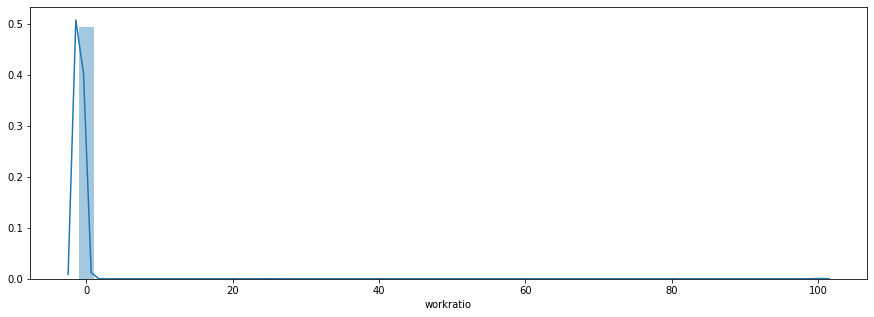

In [134]:
sns.distplot(issues.workratio)

<AxesSubplot:xlabel='workratio', ylabel='issue_id'>

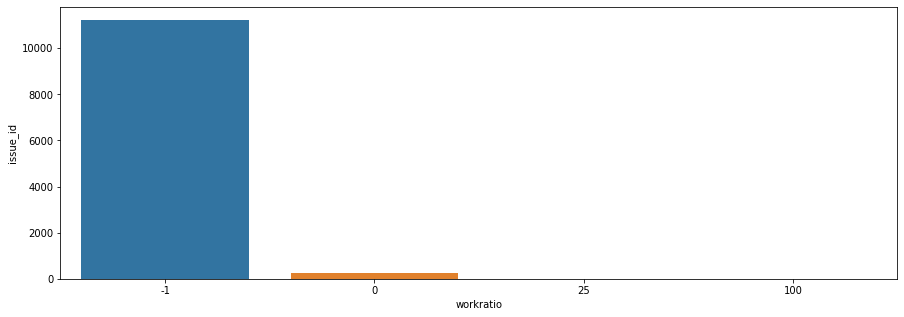

In [135]:
sns.barplot(x="workratio", y="issue_id", data=issues.groupby("workratio").count().reset_index())

### IssueType

<AxesSubplot:xlabel='issuetype_name', ylabel='count'>

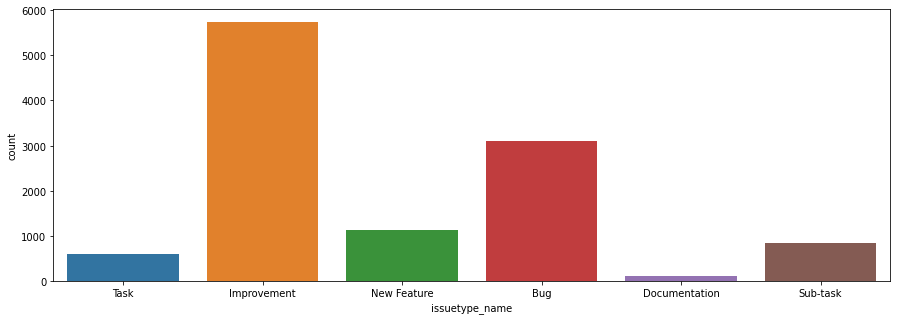

In [136]:
sns.countplot(x="issuetype_name", data=issues[["issue_id", "issuetype_name"]])

### Resolution

In [137]:
issues.resolution_name.unique()

array([nan, 'Fixed', 'Duplicate', "Won't Do", "Won't Fix", 'Done',
       'Not an issue', 'Canceled', 'Cannot Reproduce', 'Moved To GitHub',
       'Incomplete', 'Not A Bug', 'UNRESOLVED'], dtype=object)

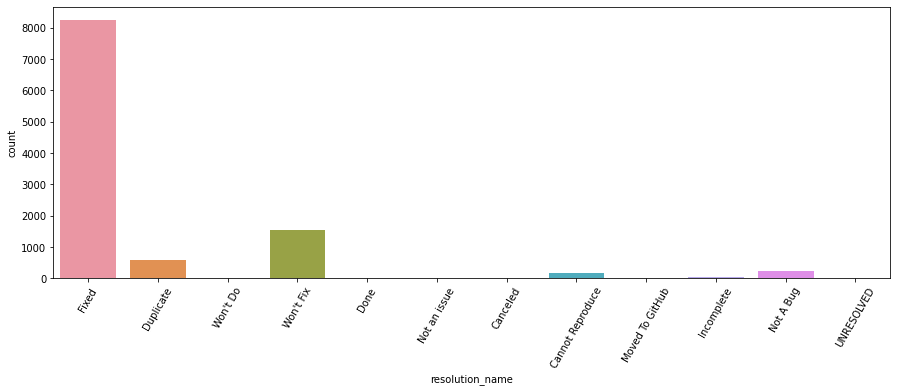

In [138]:
ax = sns.countplot(x="resolution_name", data=issues[["issue_id", "resolution_name"]])
ax.tick_params(axis='x', labelrotation= 60)

### Priority

In [139]:
issues.priority_name.unique()

array(['Major', 'Minor', 'Trivial', 'Blocker', 'Critical'], dtype=object)

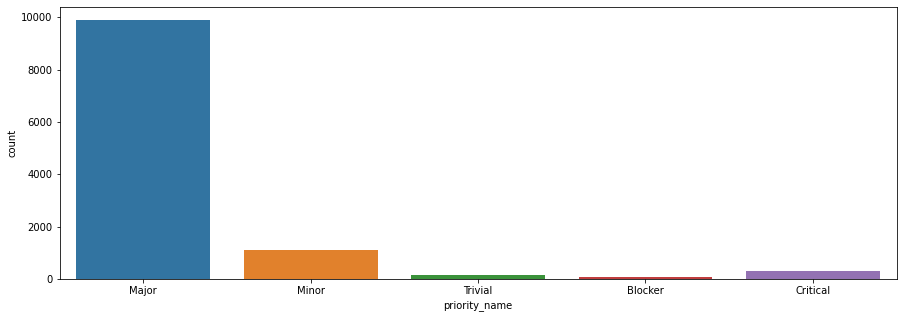

In [140]:
ax = sns.countplot(x="priority_name", data=issues[["issue_id", "priority_name"]])

## Labels

In [171]:
labels_merge = labels.merge(issues, on="issue_id")

**Number of labels**

In [189]:
labels.label = labels.label.str.lower()
len(labels.label.unique())

192

**Number of issues with x number of labels**

<AxesSubplot:xlabel='label', ylabel='count'>

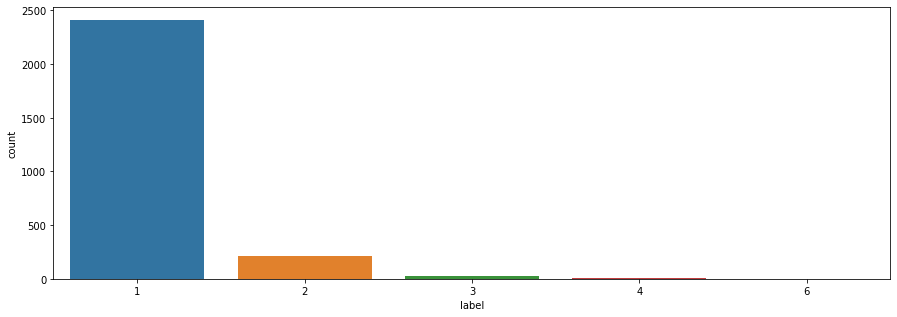

In [190]:
sns.countplot(labels_merge.groupby("issue_id").count().label)

**Top labels**

<AxesSubplot:>

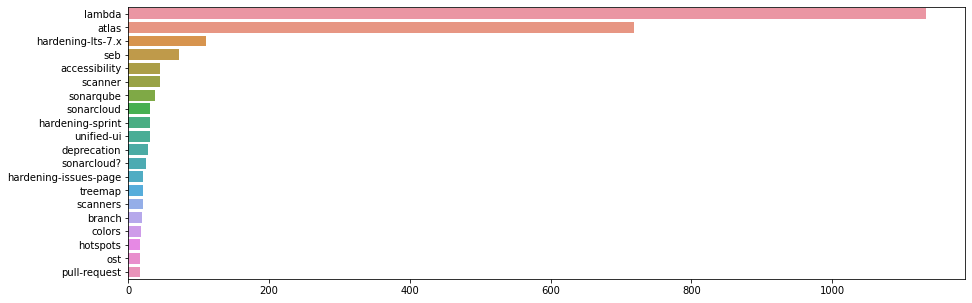

In [191]:
vals = labels.label.value_counts().head(20)
sns.barplot(x = vals.values, y=vals.index)

* Each issue has at least one label
* Lambda label seem to be the most popular ones by far

### Versions

In [152]:
versions_merged = versions.merge(issues, on="issue_id")

In [153]:
len(versions.version_name.unique())

143

In [154]:
top_versions = versions.groupby("version_name").count().issue_id.reset_index().sort_values(by="issue_id", ascending=False)
top_versions = top_versions[top_versions.version_name > "4.5.5"]

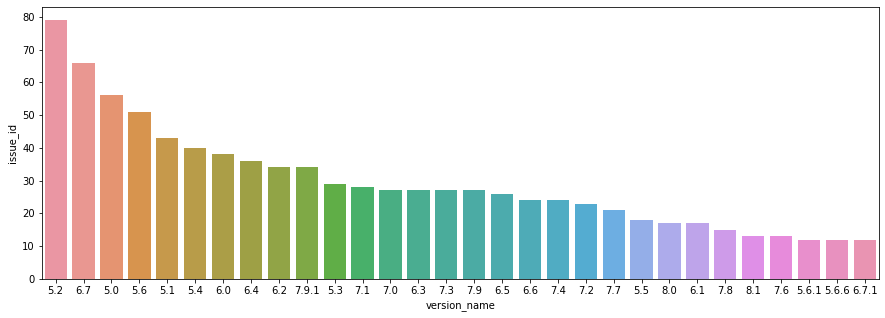

In [155]:
ax = sns.barplot(x="version_name", y="issue_id", data=top_versions[["issue_id", "version_name"]].head(30))

In [156]:
top_versions.head(10).version_name.values

array(['5.2', '6.7', '5.0', '5.6', '5.1', '5.4', '6.0', '6.4', '6.2',
       '7.9.1'], dtype=object)

In [157]:
versions_sorted = versions.sort_values(by="version_name").version_name.unique()

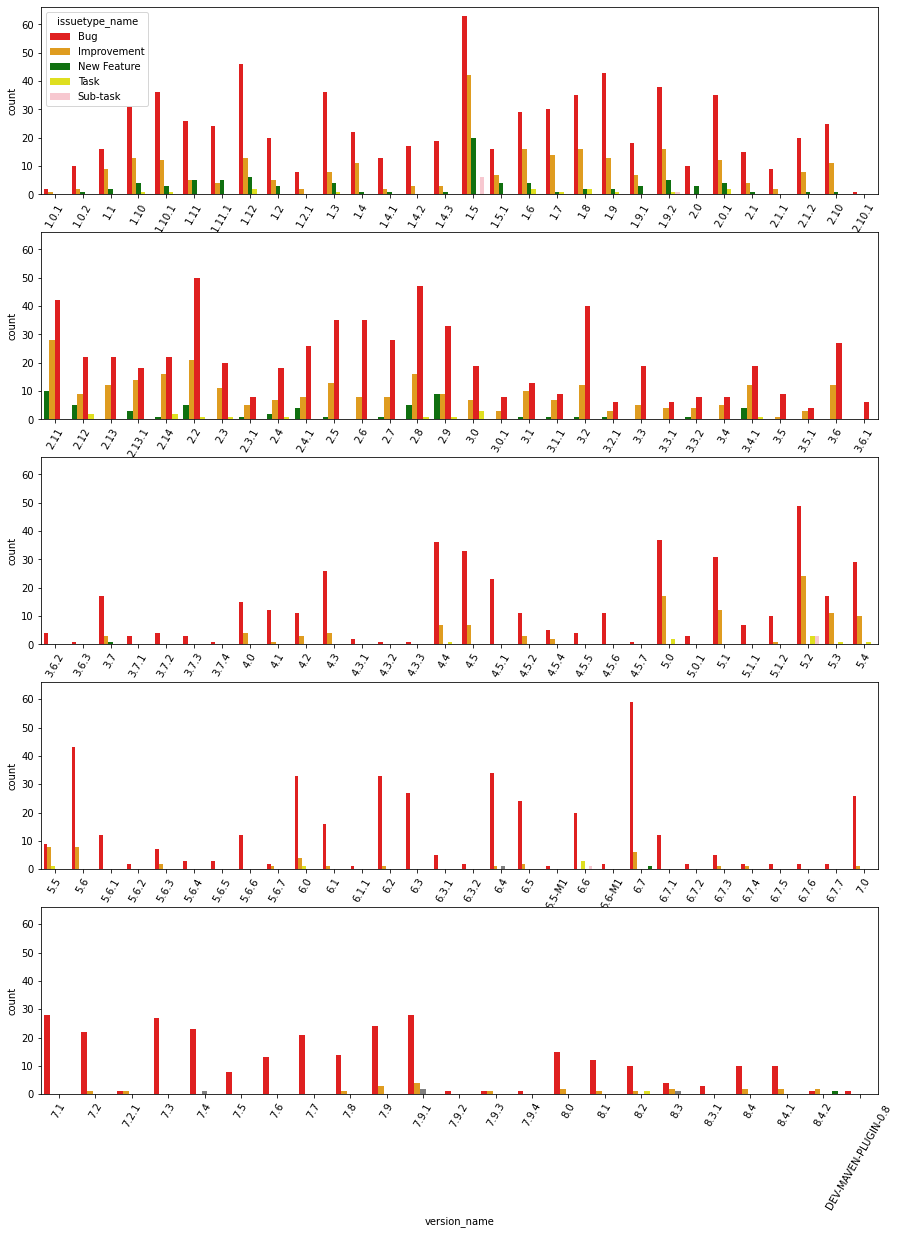

In [161]:
f, axes = plt.subplots(5,1, figsize=(15,20), sharey=True)
for i in range(5):
    data = versions_merged[versions_merged.version_name.isin(versions_sorted[30*i:30*(i+1)])]
    ax = sns.countplot(ax=axes[i], x="version_name", 
                       hue="issuetype_name", data=data.sort_values(by="version_name").head(3000),
                      palette={"Bug":"r","Improvement":"orange",
                               "New Feature": "green",
                               "Task": "yellow",
                               "Sub-task": "pink",
                              "Documentation": "grey"})
    ax.tick_params(axis='x', labelrotation= 60)
    if i > 0:
        ax.get_legend().remove()

## No version issues
Ideally all bugs would be labeled with a version. Why is it not the case?

In [162]:
no_version_issues = issues[~issues.issue_id.isin(versions_merged.issue_id.unique())]
bug_no_version = no_version_issues[no_version_issues.issuetype_name == "Bug"]
bug_no_version

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-15 12:37:57+00:00,-1,NaT,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,[<JIRA Component: name='Portfolio & Applicatio...,NaN,NaN,NaN,NaN,NaN,When using {{api/views/add_sub_view}} with a d...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,It should not be possible to use a description...,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1.0,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-18 09:41:58+00:00,-1,NaT,<JIRA Watchers at 5064045088>,2020-09-08 07:52:57+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-18 09:41:58+00:00,Closed,"[<JIRA Component: name='Security Hotspots', id...",NaN,NaN,NaN,NaN,NaN,Facet `Security Review` is not working while c...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Projects page - Security Review facet on new c...,Jacek Poreda,[],NaN,NaN,Jacek Poreda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-21 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1.0,Fixed,0
46,SONAR-13854,97337,Bug,P3-Medium,0|i0dh3z:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061507392>,2020-09-04 22:18:18+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-04 22:20:07+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,All plugins extending a base plugin share the ...,NaN,SonarQube,NaN,NaN,Na

In [163]:
bug_no_version[bug_no_version.status_name == "Resolved"][["summary", "description", "status_name", "resolution_name", "resolutiondate","issue_id", "issue_key"]]

,summary,description,status_name,resolution_name,resolutiondate,issue_id,issue_key
148,Maintainability Rating and Technical debt rati...,When updating an issue of type code smells on ...,Resolved,Fixed,2020-07-31 09:30:23+00:00,96361,SONAR-13694
250,Background task reload doesn't update as expected,In the background tasks page:\r\n\r\nPress the...,Resolved,Fixed,2020-08-14 13:47:18+00:00,94999,SONAR-13507


In [50]:
bug_no_version[bug_no_version.resolution_name == "Fixed"]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
35,SONAR-13866,97392,Bug,P3-Medium,0|i0dhfz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-15 12:37:57+00:00,-1,NaN,<JIRA Watchers at 5060475680>,2020-09-09 08:44:19+00:00,NaN,NaN,Major,Enterprise,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jacek Poreda,2020-09-15 12:37:57+00:00,Closed,[<JIRA Component: name='Portfolio & Applicatio...,NaN,NaN,NaN,NaN,NaN,When using {{api/views/add_sub_view}} with a d...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,It should not be possible to use a description...,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaN,0,1,Bug,3,Major,jacek.poreda,jacek.poreda,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,6,Closed,1.0,Fixed,0
43,SONAR-13857,97360,Bug,P3-Medium,0|i0dh93:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-18 09:41:58+00:00,-1,NaN,<JIRA Watchers at 5064045088>,2020-09-08 07:52:57+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-18 09:41:58+00:00,Closed,"[<JIRA Component: name='Security Hotspots', id...",NaN,NaN,NaN,NaN,NaN,Facet `Security Review` is not working while c...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Projects page - Security Review facet on new c...,Jacek Poreda,[],NaN,NaN,Jacek Poreda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-09-21 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,jacek.poreda,jacek.poreda,jacek.poreda,jacek.poreda,6,Closed,1.0,Fixed,0
52,SONAR-13847,97230,Bug,P3-Medium,0|i0dgg7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-04 13:22:54+00:00,-1,NaN,<JIRA Watchers at 5061637168>,2020-09-02 15:59:37+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Jeremy Davis,2020-09-04 13:22:54+00:00,Closed,"[<JIRA Component: nam

### Status

In [164]:
issues.status.unique()

array(['Open', 'In Review', 'In Progress', 'Closed', 'To Do', 'Resolved',
       'Reopened'], dtype=object)

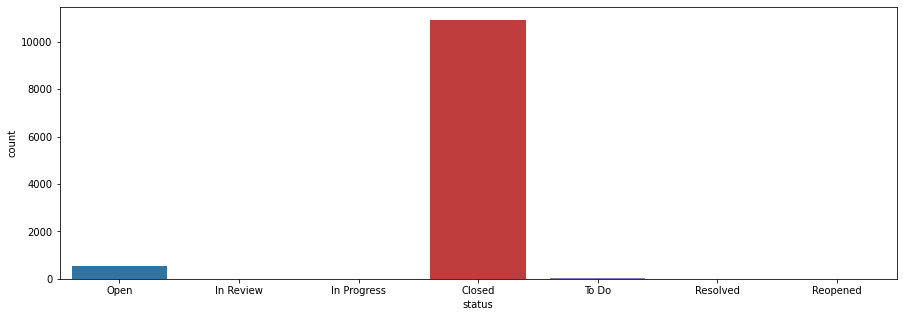

In [165]:
ax = sns.countplot(x="status", data=issues[["issue_id", "status"]])

### Edition

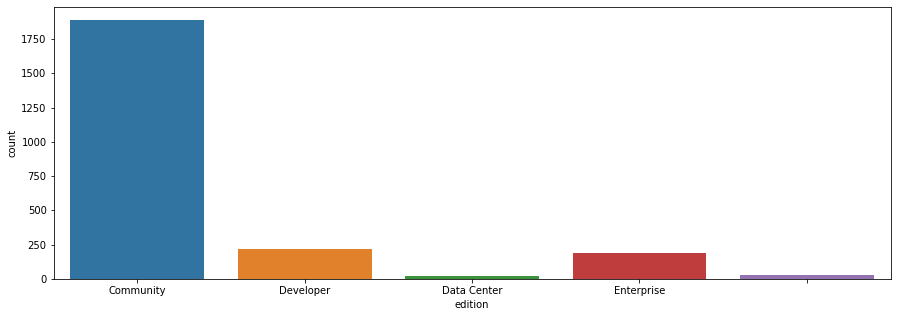

In [166]:
ax = sns.countplot(x="edition", data=issues)

In [167]:
issues.edition.describe()

count          2341
unique            5
top       Community
freq           1889
Name: edition, dtype: object

In [168]:
issues.edition.isna().sum()

9166

In [169]:
issues[(issues.edition.isna()) & (issues.resolution=="Fixed") & (issues.issuetype_name=="Bug")]

,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
1537,SONAR-11537,79313,Bug,NaN,0|i0ak6v:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.6', id='14753'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-03 17:05:12+00:00,-1,NaT,<JIRA Watchers at 4948864592>,2018-11-27 14:36:47+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='41651'>],Janos Gyerik,2018-12-17 16:42:19+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,"Sometimes, Check Run is not created at the end...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Fix intermittent failures to create Check Run ...,Janos Gyerik,[],NaN,NaN,Janos Gyerik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-12-10 00:00:00+00:00,0,1,Bug,3,Major,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,janos.gyerik,6,Closed,1.0,Fixed,0
1682,SONAR-11300,76901,Bug,NaN,0|i0a5j3:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-24 09:26:19+00:00,-1,NaT,<JIRA Watchers at 4869443984>,2018-09-21 12:10:27+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Fabrice Bellingard,2018-11-19 20:05:22+00:00,Closed,[],NaN,NaN,NaN,NaN,NaN,When the duration of a SonarCloud coupon excee...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Coupons with periods larger than 1 year have a...,Jean-Baptiste Lievremont,[],NaN,NaN,Jean-Baptiste Lievremont,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2018-09-28 00:00:00+00:00,0,1,Bug,3,Major,fabrice.bellingard,fabrice.bellingard,jean-baptiste.lievremont,jeanbaptiste.lievremont,jean-baptiste.lievremont,jeanbaptiste.lievremont,6,Closed,1.0,Fixed,0
1693,SONAR-11280,76792,Bug,NaN,0|i0a4vb:,NaN,NaN,SONAR,NaN,NaN,"[<JIRA Version: name='7.4', id='14549'>]",NaN,NaN,NaN,Fixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-11 16:07:18+00:00,-1,NaT,<JIRA Watchers at 4864664864>,2018-09-18 15:09:28+00:00,NaN,NaN,Major,NaN,NaN,NaN,NaN,['seb'],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='7.3', id='14464'>]",[<JIRA IssueLink: id='40346'>],Sebastien Lesaint,2018-10-11 16:09:12+00:00,Closed,"[<JIRA Component: name='Compute Engine', id='1...",NaN,NaN,NaN,NaN,NaN,"If a Billing exception is raised on a PR, the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,PostProjectAnalysisTasks API fails when consum...,Sebastien Lesaint,[],NaN,NaN,Se